In [3]:
import pandas as pd

In [2]:
import matplotlib as mlt
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

In [12]:
import numpy as np

In [7]:
import seaborn as sns

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualization

In [4]:
df = pd.read_csv('stock_price.csv', index_col=False)

## Some statistics

In [16]:
df.describe()

,Close,Open,High,Low,Vol,Change_%
count,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000
mean,130.356260,130.297874,131.417356,129.26139,6.016475e+06,0.013694
std,38.247535,38.240502,38.330706,38.15226,3.290451e+06,1.558338
min,55.070000,54.650000,56.700000,54.01000,1.193025e+06,-12.850000
25%,94.530000,94.500000,95.347500,93.62000,3.797874e+06,-0.700000
50%,126.950000,126.825000,127.825000,125.83500,5.180760e+06,0.020000
75%,159.727500,159.720000,160.870000,158.64750,7.251085e+06,0.740000
max,215.800000,215.380000,215.900000,214.30000,4.121260e+07,11.510000


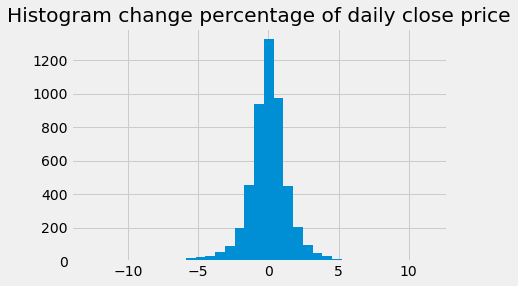

In [18]:
plt.hist(df['Change_%'], bins="rice")
plt.title("Histogram change percentage of daily close price")
plt.show()

The histogram quite centered around zero and it seems symmetric.  
However, this histogram has negative tails that need to notice.

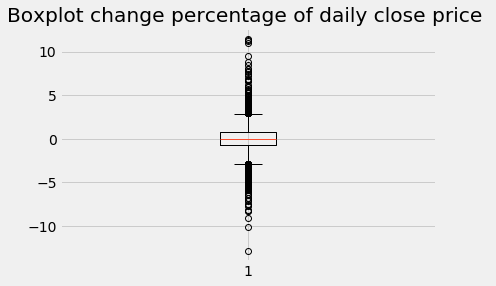

In [17]:
plt.boxplot(df['Change_%'])
plt.title("Boxplot change percentage of daily close price ")
plt.show()

The boxplot shows full of outliers.  
The interquartile range (the height of the box) is quite narrow if compared with the distribution total range.  
This phenomenon is called fat tails and it’s very common in stock analysis.

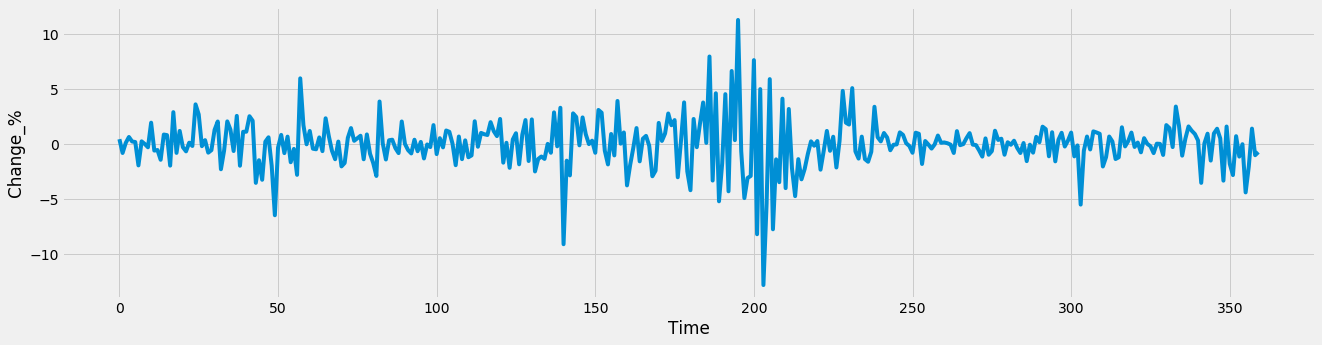

In [6]:
plt.figure(figsize=(20,5))
plt.plot(df['Change_%'][:360])
plt.xlabel("Time")
plt.ylabel("Change_%")
plt.show()

The Change_% plot give us some question that may be this have season repeat in this time serie.  
We decompose it to see some interesting season with inteval of 2 weeks

Text(0.5, 0.98, 'Additive Decompose')

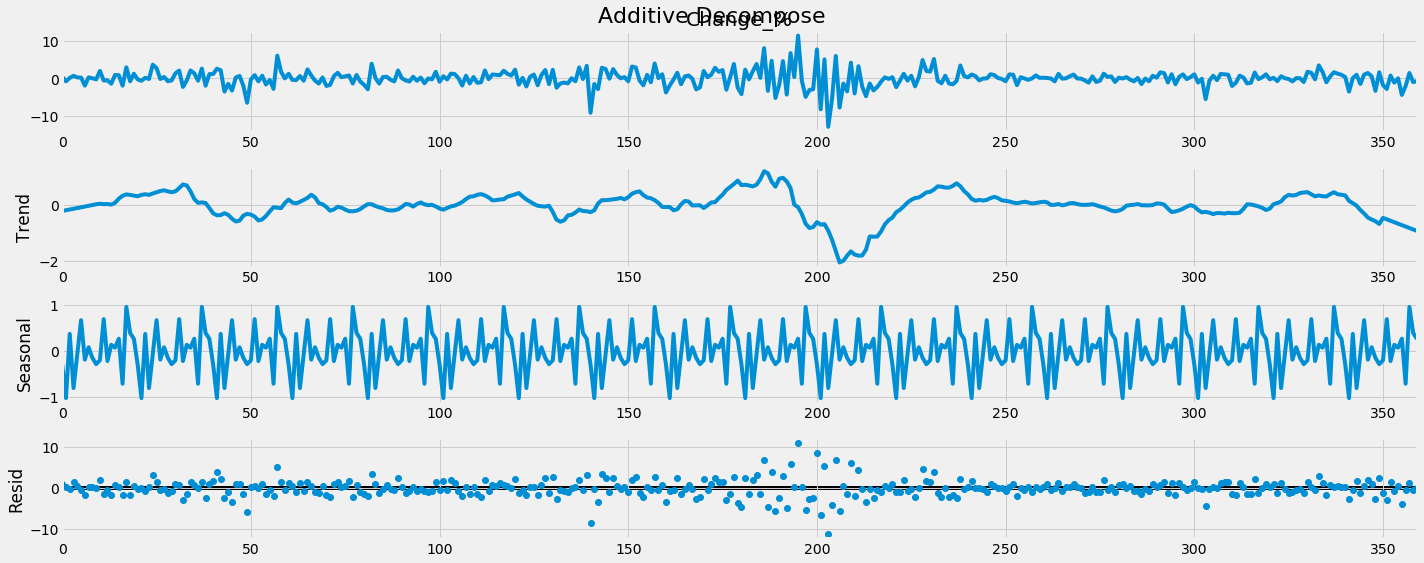

In [24]:
plt.rcParams.update({'figure.figsize': (20,8)})
result_add = seasonal_decompose(df['Change_%'][:360], model='additive', period=20, extrapolate_trend='freq')

result_add.plot().suptitle('Additive Decompose', fontsize=22)

## With indicators

In [32]:
df = pd.read_csv('stock_price_with_indicators.csv', index_col=False)

### Heat map

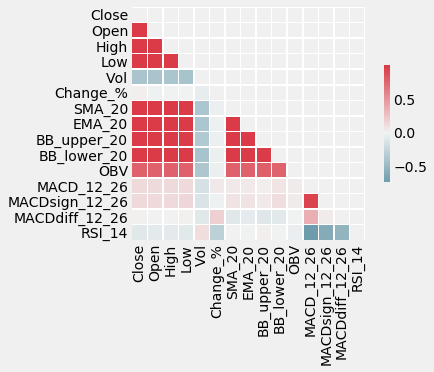

In [13]:
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

Heatmap show that Trend indicators (SMA, EMA) or Bollinger Bands have a strong correlation with price. That quite easy to understand cause the SMA, EMA are moving average of Close price and Bollinger Bands calculates through SMA.  
The RSI give overbought and sold signals so it have less correlation with the price.

### Trend Indicators

Text(0, 0.5, 'Price (USD)')

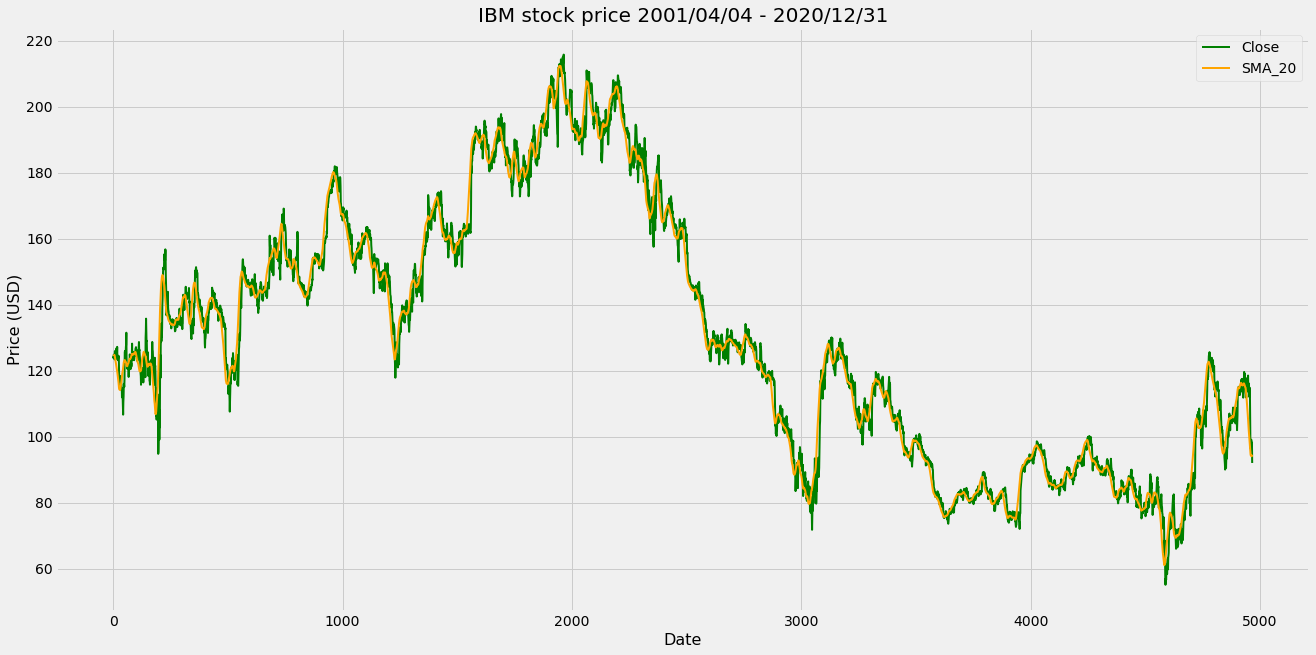

In [15]:
colors = ['green', 'orange']

df[['Close', 'SMA_20']].plot(color=colors, linewidth=2, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Close', 'SMA_20'], fontsize=14)

# title and labels
plt.title('SMA of IBM 2001/04/04 - 2020/12/31', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price (USD)', fontsize=16)

Text(0, 0.5, 'Price (USD)')

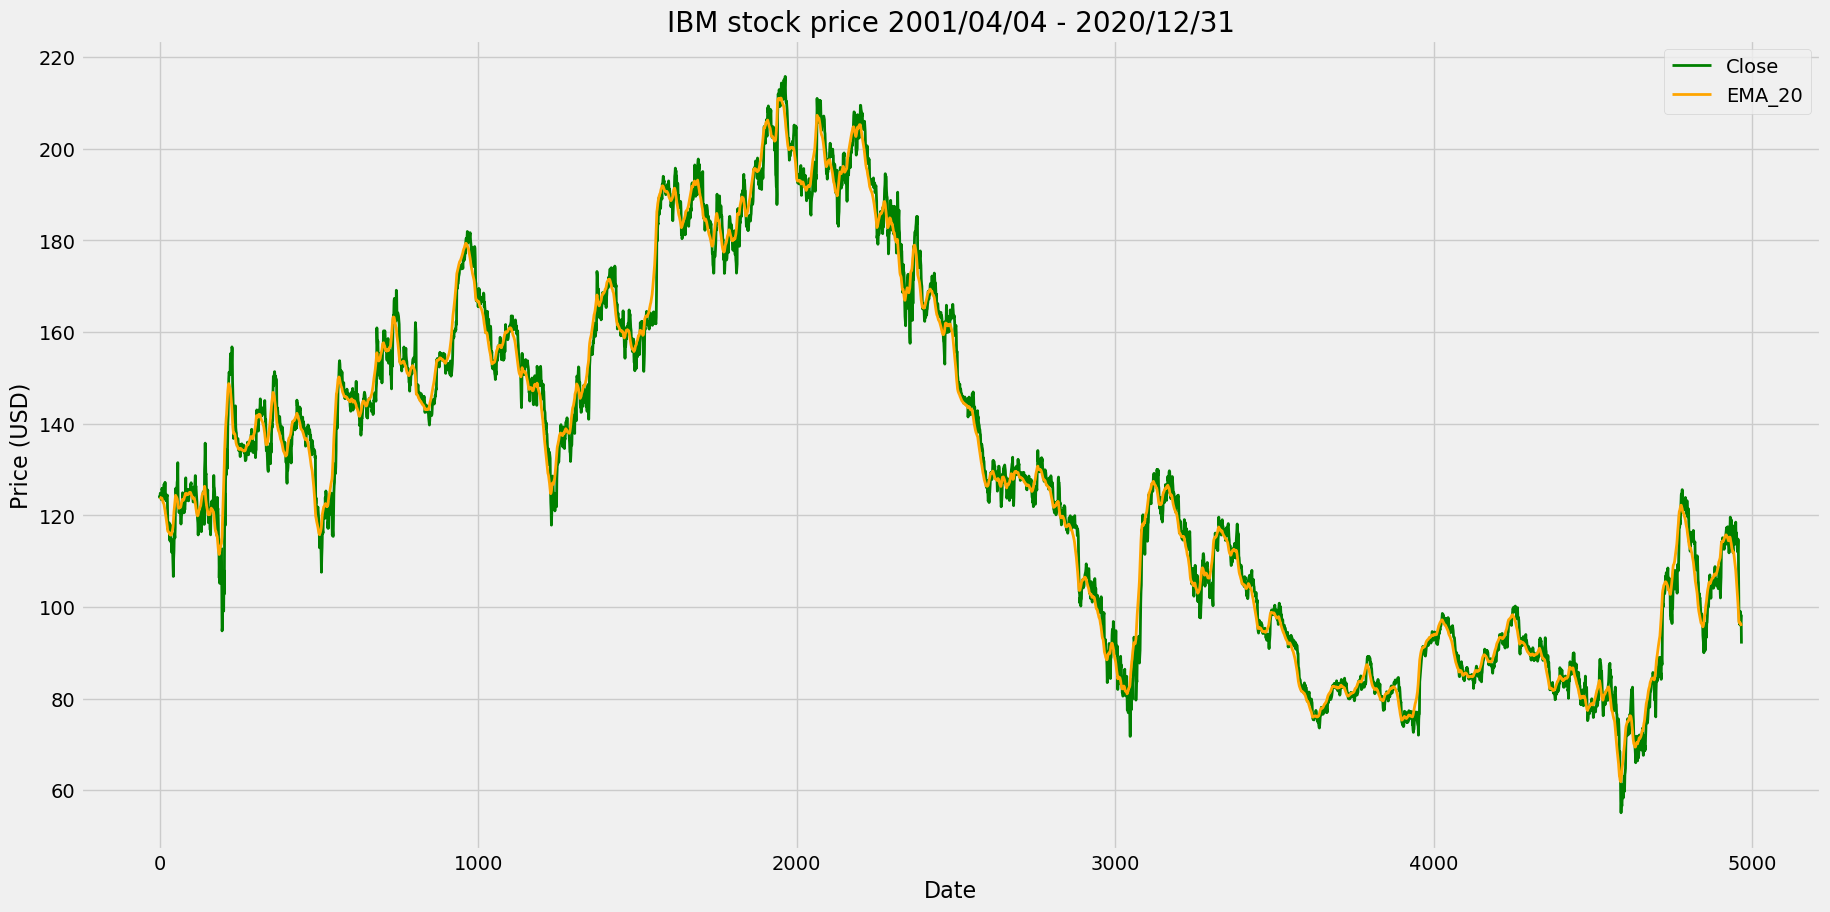

In [125]:
colors = ['green', 'orange']

df[['Close', 'EMA_20']].plot(color=colors, linewidth=2, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Close', 'EMA_20'], fontsize=14)

# title and labels
plt.title('EMA of IBM 2001/04/04 - 2020/12/31', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price (USD)', fontsize=16)

Text(0, 0.5, 'Price (USD)')

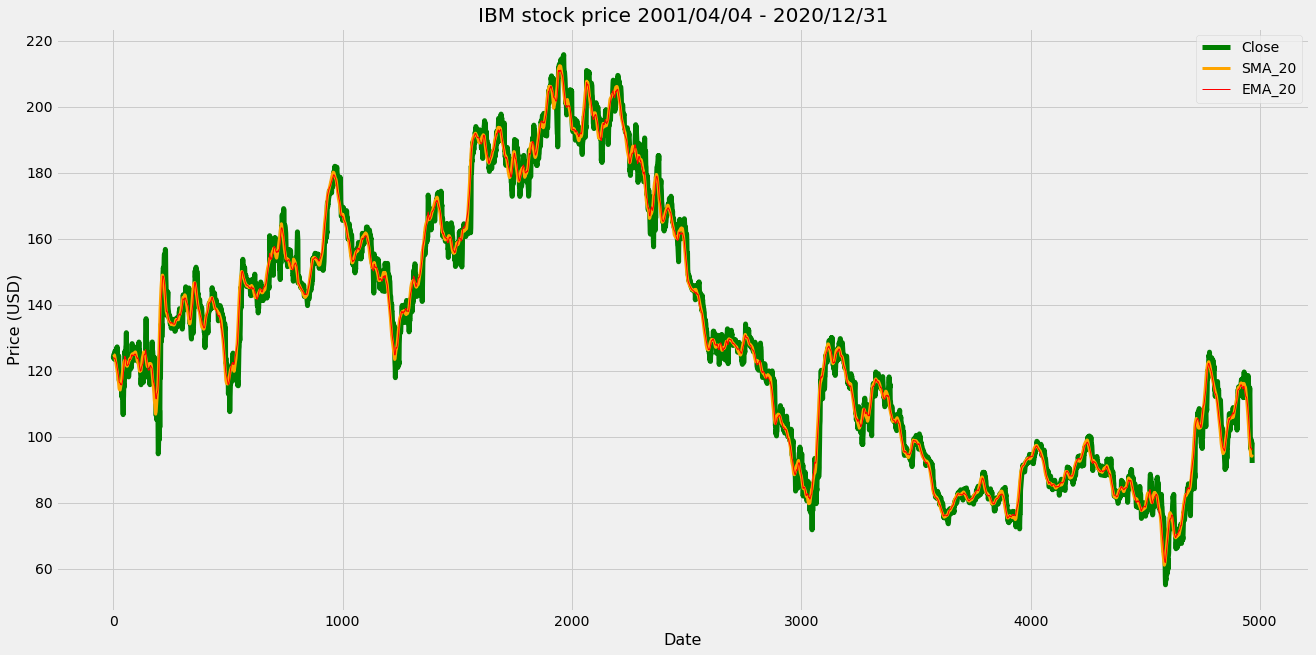

In [78]:
colors = ['green', 'orange', 'purple']

df['Close'].plot(color='green', linewidth=5, figsize=(20,10))
df['SMA_20'].plot(color='orange', linewidth=3, figsize=(20,10))
df['EMA_20'].plot(color='red', linewidth=1, figsize=(20,10))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Close', 'SMA_20', 'EMA_20'], fontsize=14)

# title and labels
plt.title('IBM stock price 2001/04/04 - 2020/12/31', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price (USD)', fontsize=16)

## Mean Reversion Indicators

Text(0, 0.5, 'Price (USD)')

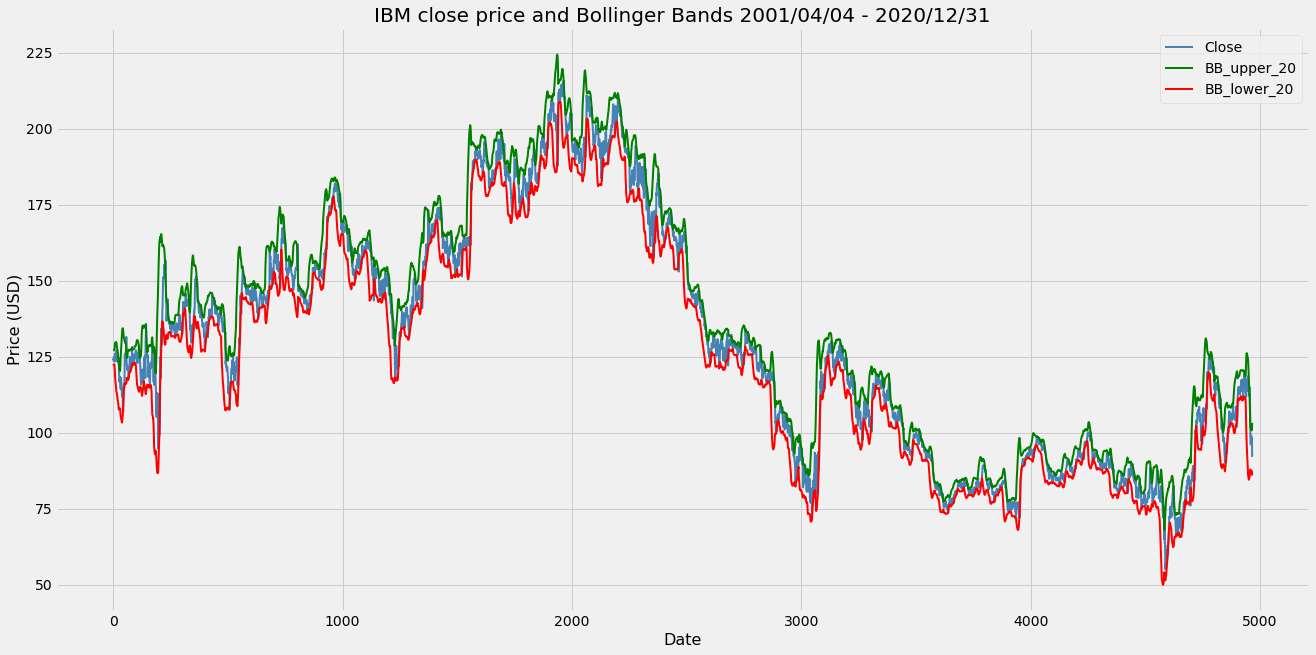

In [23]:
colors = ['steelblue', 'green', 'red']

df[['Close', 'BB_upper_20', 'BB_lower_20']].plot(color=colors, linewidth=2, figsize=(20,10))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Close', 'BB_upper_20', 'BB_lower_20'], fontsize=14)

# title and labels
plt.title('IBM close price and Bollinger Bands 2001/04/04 - 2020/12/31', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price (USD)', fontsize=16)

No handles with labels found to put in legend.


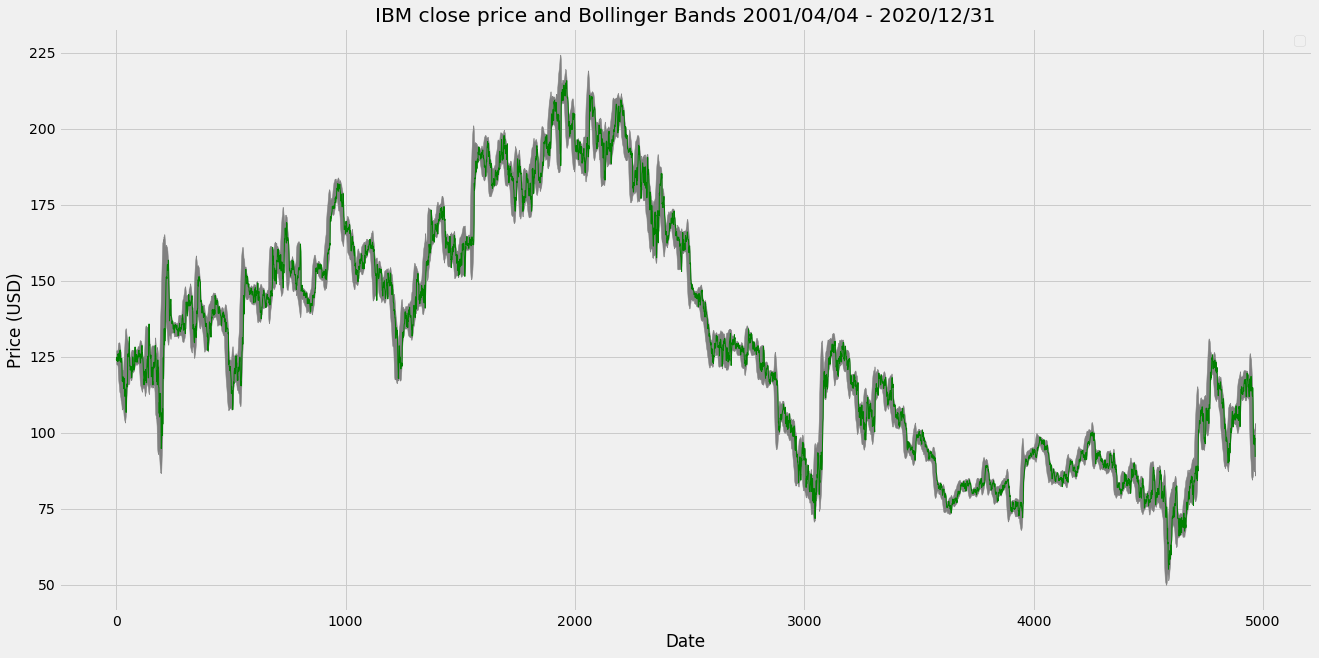

In [25]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x_axis = df.index.get_level_values(0)

# Plot shaded 20 Day Bollinger Band for IBM
ax.fill_between(x_axis, df['BB_upper_20'], df['BB_lower_20'], color='grey')

# Plot Adjust Closing Price
ax.plot(x_axis, df['Close'], color='green', linewidth=1)

# Set Title & Show the Image
ax.set_title('IBM close price and Bollinger Bands 2001/04/04 - 2020/12/31')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend()
plt.show();

## Volume Indicators

Text(0.5, 1.0, 'OBV of IBM 2001/04/04 - 2020/12/31')

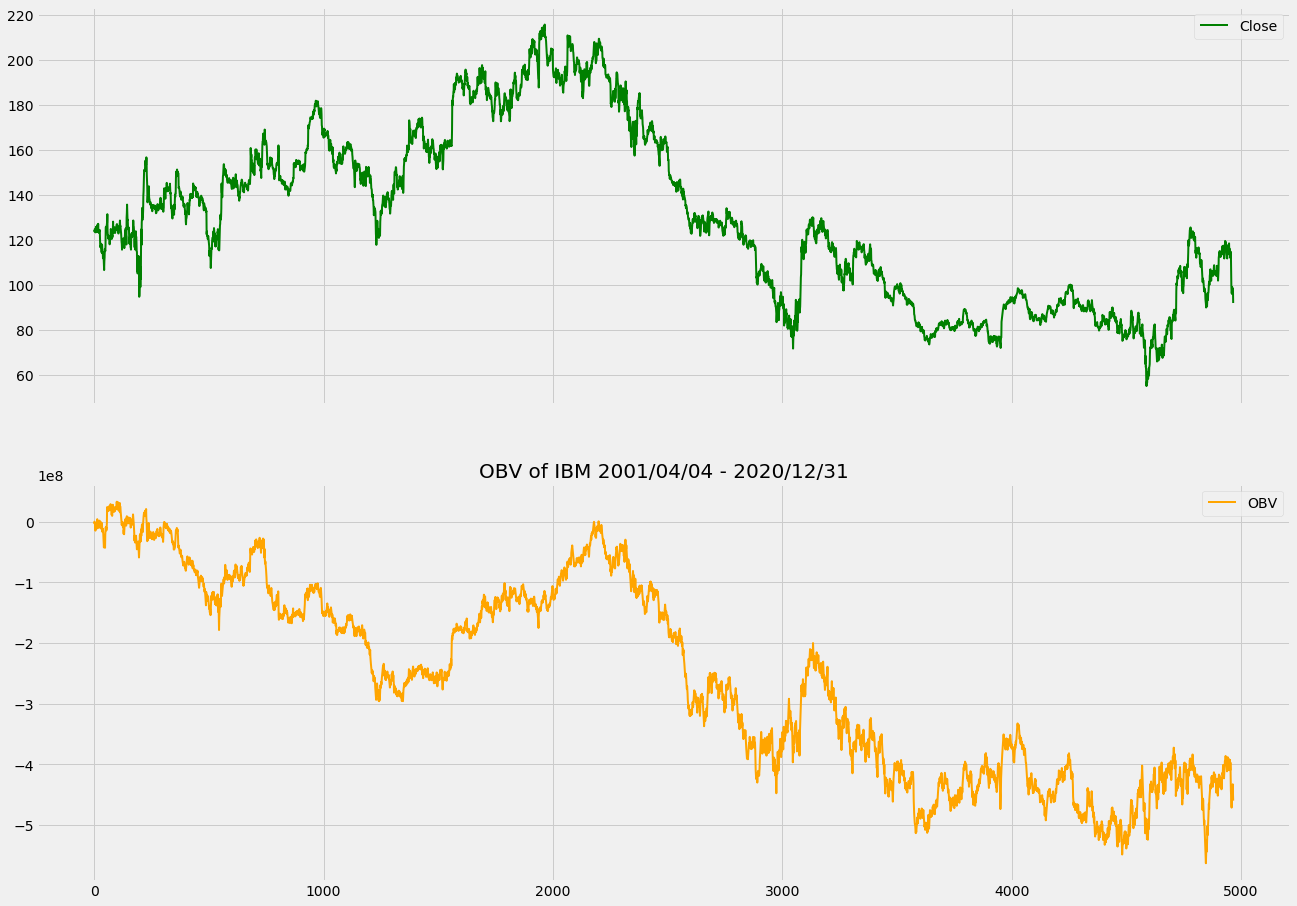

In [51]:
colors=['green', 'orange']
df[['Close', 'OBV']].plot(subplots=True, color=colors, linewidth=2, figsize=(20, 15))
plt.title('OBV of IBM 2001/04/04 - 2020/12/31', fontsize=20)

## Momentum Indicators

Text(0.5, 1.0, 'MACD of IBM 2001/04/04 - 2020/12/31')

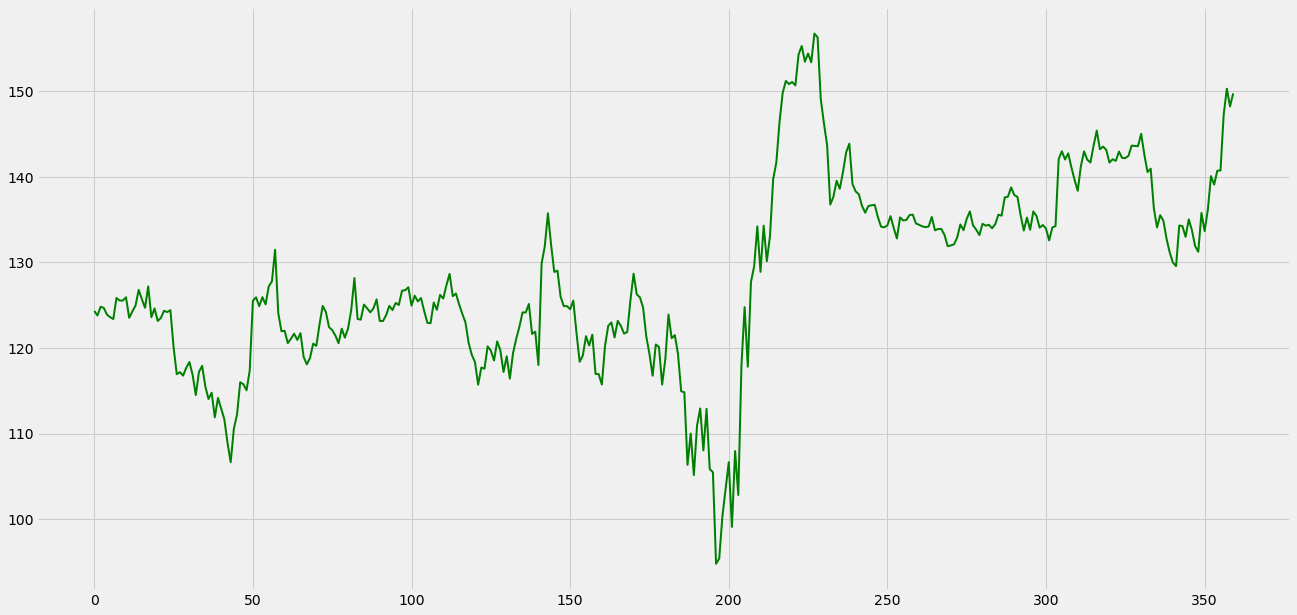

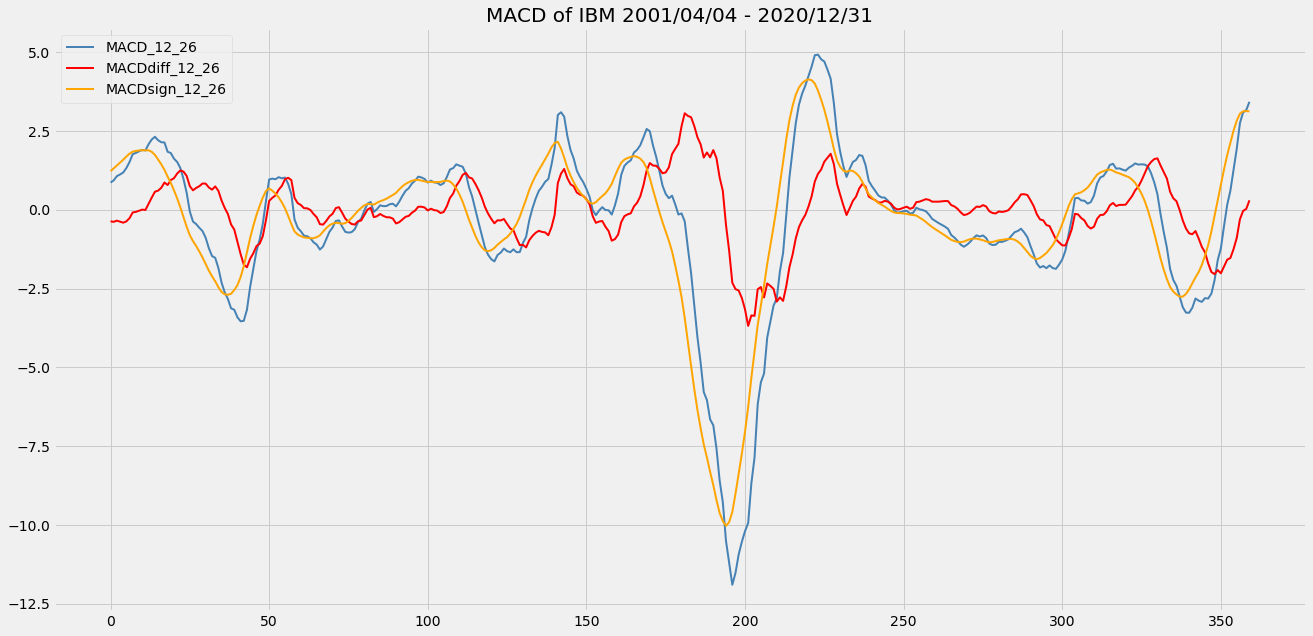

In [62]:
# we plot MACD in a year
colors = ['steelblue', 'red', 'orange']

fig, ax = plt.subplots(figsize=(20,10))

df['Close'][:360].plot(color='green', linewidth=2)

df[['MACD_12_26', 'MACDdiff_12_26', 'MACDsign_12_26']][:360].plot(color=colors, linewidth=2, figsize=(20,10))
# title and labels
plt.title('MACD of IBM 2001/04/04 - 2020/12/31', fontsize=20)

## Relative Strength Indicators

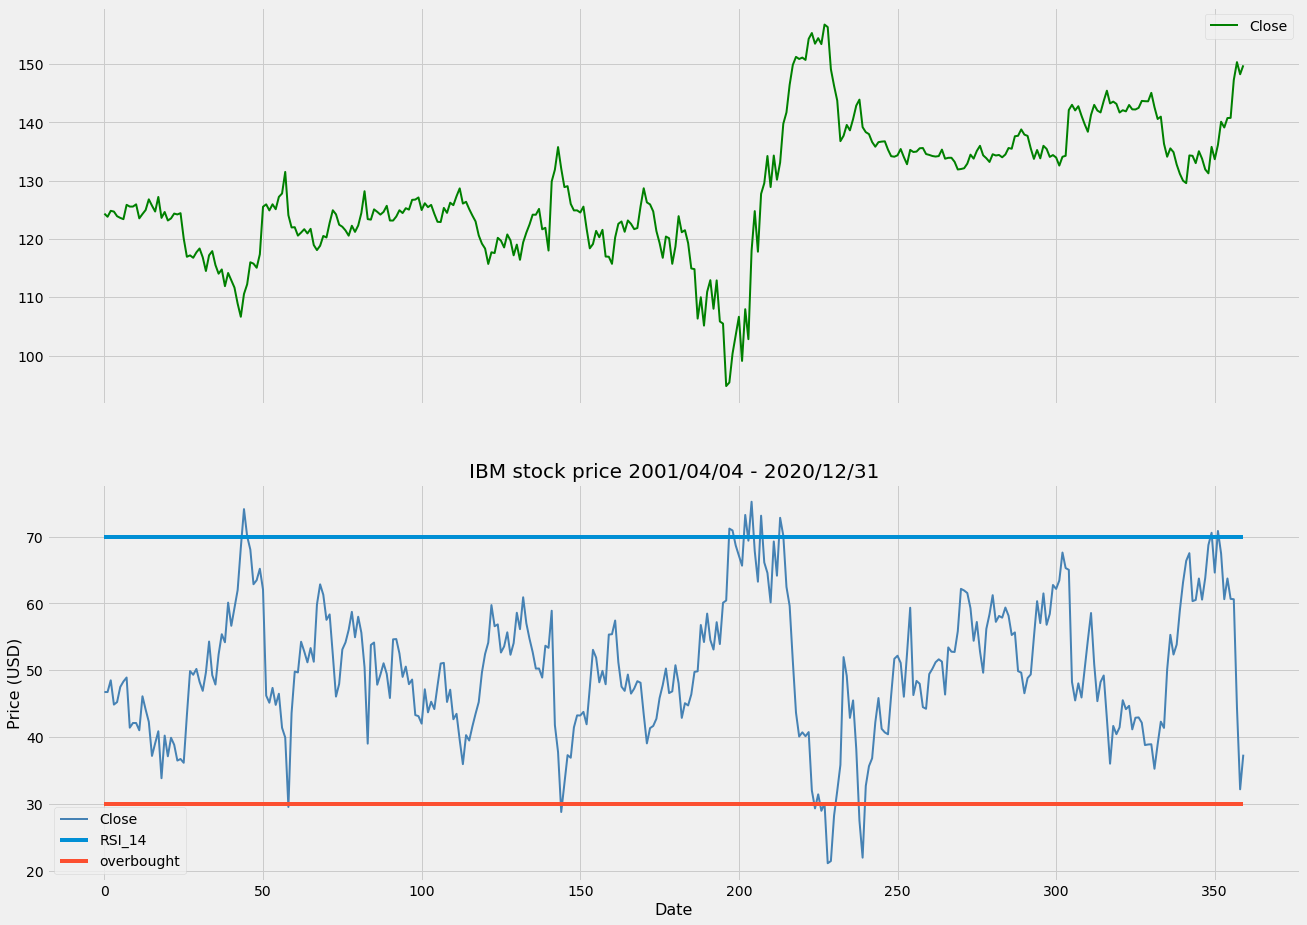

In [80]:
df[['Close', 'RSI_14']][:360].plot(subplots=True, color=['green', 'steelblue'], linewidth=2, figsize=(20,15))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('IBM stock price 2001/04/04 - 2020/12/31', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price (USD)', fontsize=16)

plt.plot(df.index[:360], [70] * 360)
plt.plot(df.index[:360], [30] * 360)
plt.legend(labels =['Close', 'RSI_14', "overbought", "oversold"], fontsize=14)

Each indicator give us specific information.  
To find out which one is suit for our model, we will try one by one.